# This noteboook is used to get predictions for heat transfer coefficient (h) and sulfur average temperature (T)
### *Maximum time for accurate predictions is t=7200s*

### Import tools to get and plot results

In [1]:
from stesml.stes_model import stes_model
from stesml.plot_tools import plot_results
from stesml.plot_tools import save_figures

/Users/kmenear/Projects/sulfur_tes_ml/envSulfurTES/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### Get predictions for heat transfer coefficient, up until some end time

       flow-time   Tw   Ti      h_hat
0          500.0  600  520  46.361824
1          500.1  600  520  46.361824
2          500.2  600  520  46.361824
3          500.3  600  520  46.361824
4          500.4  600  520  46.361824
...          ...  ...  ...        ...
66995     7199.5  600  520  37.566708
66996     7199.6  600  520  37.566708
66997     7199.7  600  520  37.566708
66998     7199.8  600  520  37.566708
66999     7199.9  600  520  37.566708

[67000 rows x 4 columns]


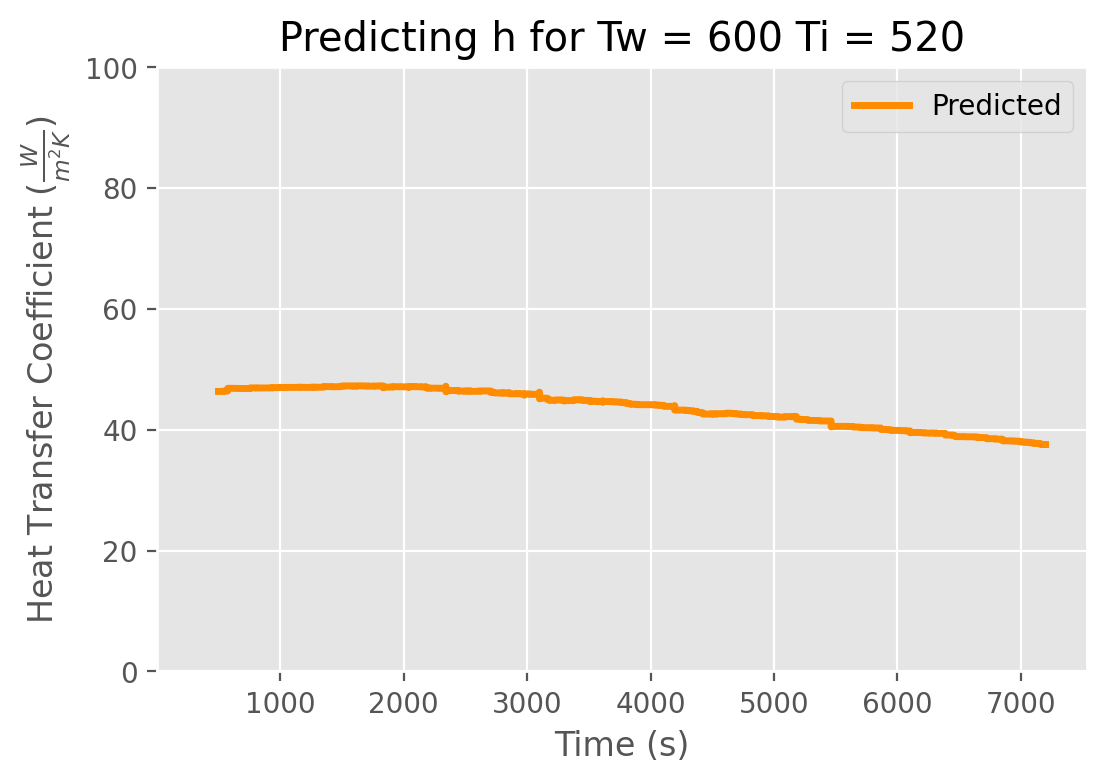

In [8]:
Ti = 520 # Kelvin
Tw = 600 # Kelvin
start_time = 500 # seconds
end_time = 7200 # seconds
stepsize = 0.1 # seconds
model_name = 'XGBoost_tmin_360' # Use 'XGBoost_tmax_360' for predictions of h for t <= 360s
model_type = 'XGBoost'

X = stes_model.predict_h(Ti, Tw, start_time, end_time, stepsize, model_name, model_type)

print(X)
figure = plot_results(X)

### Optionally save this figure

In [20]:
figures_directory = save_figures(figure)
print(f'Figure saved to {figures_directory}')

Figure saved to ../figures/20220728-004136/


### Get predictions for heat transfer coefficient at a specific time

In [9]:
Ti = 500 # Kelvin
Tw = 600 # Kelvin
time = 2000 # seconds
model_name = 'XGBoost_tmin_360' # Use 'XGBoost_tmax_360' for predictions of h for t <= 360s
model_type = 'XGBoost'

h = stes_model.predict_h_at_time_t(Ti, Tw, time, model_name, model_type)

print(f'h is {h} at time {time}s.')

h is 44.69283676147461 at time 2000s.


### Get predictions for average heat transfer coefficient during a range of time

In [10]:
Ti = 500 # Kelvin
Tw = 600 # Kelvin
start_time = 500 # seconds
end_time = 7000 # seconds
stepsize = 0.1 # seconds
model_name = 'XGBoost_tmin_360' # Use 'XGBoost_tmax_360' for predictions of h for t <= 360s
model_type = 'XGBoost'

average_h = stes_model.predict_average_h(Ti, Tw, start_time, end_time, stepsize, model_name, model_type)

print(f'Average h is {average_h} between time {start_time}s and {end_time}s.')

            Tw   Ti      h_hat
flow-time                     
500.0      600  500  43.839432
500.1      600  500  43.839432
500.2      600  500  43.839432
500.3      600  500  43.839432
500.4      600  500  43.839432
...        ...  ...        ...
6999.5     600  500  37.983479
6999.6     600  500  37.983479
6999.7     600  500  37.983479
6999.8     600  500  37.983479
6999.9     600  500  37.983479

[65000 rows x 3 columns]
Average h is 42.549869537353516 between time 500s and 7000s.


### Get predictions for sulfur average temperature, up until some end time

#### If using the hybrid model, give the name and type of both the T & h models used, as well as the hybrid split time.

2022-09-21 00:38:01.632974: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-21 00:38:01.866549: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


       flow-time   Tw   Ti    Tavg_hat
0            0.0  600  500  500.286499
1            0.1  600  500  500.304474
2            0.2  600  500  500.322449
3            0.3  600  500  500.340424
4            0.4  600  500  500.358398
...          ...  ...  ...         ...
71995     7199.5  600  500  551.355931
71996     7199.6  600  500  551.356337
71997     7199.7  600  500  551.356744
71998     7199.8  600  500  551.357150
71999     7199.9  600  500  551.357556

[72000 rows x 4 columns]


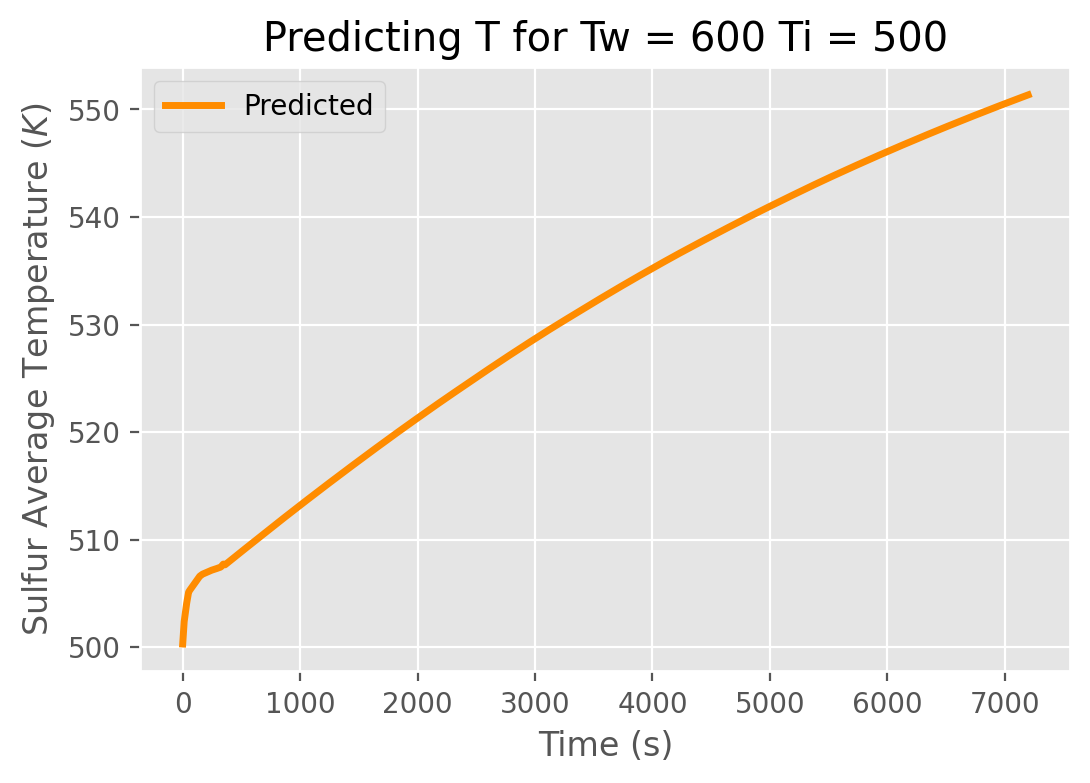

In [2]:
Ti = 500 # Kelvin
Tw = 600 # Kelvin
end_time = 7200 # seconds
stepsize = 0.1 # seconds
T_model_name = 'NN_tmax_360'
T_model_type = 'NN'
hybrid_model = True # Set to True if using a hybrid model

if hybrid_model:
    h_model_name = 'XGBoost_tmin_360'
    h_model_type = 'XGBoost'
    hybrid_split_time = 360 # seconds
    X = stes_model.predict_T(Ti, Tw, end_time, stepsize, T_model_name, T_model_type, hybrid_model, h_model_name, h_model_type, hybrid_split_time)
else:
    X = stes_model.predict_T(Ti, Tw, end_time, stepsize, T_model_name, T_model_type)

print(X)
figure = plot_results(X)

### Optionally save this figure

In [24]:
figures_directory = save_figures(figure)
print(f'Figure saved to {figures_directory}')

Figure saved to ../figures/20220728-004140/


### Get predictions for sulfur average temperature at a specific time

In [3]:
Ti = 500 # Kelvin
Tw = 600 # Kelvin
time = 7000 # seconds
T_model_name = 'NN_tmax_360'
T_model_type = 'NN'
hybrid_model = True # Set to True if using a hybrid model

if hybrid_model:
    h_model_name = 'XGBoost_tmin_360'
    h_model_type = 'XGBoost'
    hybrid_split_time = 360 # seconds
    T = stes_model.predict_T_at_time_t(Ti, Tw, time, T_model_name, T_model_type, hybrid_model, h_model_name, h_model_type, hybrid_split_time)
else:
    T = stes_model.predict_T_at_time_t(Ti, Tw, time, T_model_name, T_model_type)
    
print(f'T is {T} at time {time}s.')

T is 550.5329706273216 at time 7000s.


### Get predictions for average temperature during a range of time

In [4]:
Ti = 500 # Kelvin
Tw = 600 # Kelvin
start_time = 5000 # seconds
end_time = 7000 # seconds
stepsize = 0.1 # seconds
T_model_name = 'NN_tmax_360'
T_model_type = 'NN'
hybrid_model = True # Set to True if using a hybrid model

if hybrid_model:
    h_model_name = 'XGBoost_tmin_360'
    h_model_type = 'XGBoost'
    hybrid_split_time = 360 # seconds
    average_T = stes_model.predict_average_T(Ti, Tw, start_time, end_time, stepsize, T_model_name, T_model_type, hybrid_model, h_model_name, h_model_type, hybrid_split_time)
else:
    average_T = stes_model.predict_average_T(Ti, Tw, start_time, end_time, stepsize, T_model_name, T_model_type)
    
print(f'Average T is {average_T} between time {start_time}s and {end_time}s.')

            Tw   Ti    Tavg_hat
flow-time                      
5000.0     600  500  540.989795
5000.1     600  500  540.990337
5000.2     600  500  540.990880
5000.3     600  500  540.991422
5000.4     600  500  540.991964
...        ...  ...         ...
6999.5     600  500  550.531299
6999.6     600  500  550.531717
6999.7     600  500  550.532135
6999.8     600  500  550.532553
6999.9     600  500  550.532971

[20000 rows x 3 columns]
Average T is 545.9738300060981 between time 5000s and 7000s.
